<a href="https://colab.research.google.com/github/Sayali-hatwar/Deep-Learning/blob/main/ANN_Impementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 MB 5.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
# select important features
X = dataset.iloc[:,3:13]
X.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63


In [6]:
y = dataset.iloc[:,-1]
y.head(3)

0    1
1    0
2    1
Name: Exited, dtype: int64

In [7]:
# Feature engineering
Geography=pd.get_dummies(X['Geography'],drop_first = True)
Gender = pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
# drop non-numeric features
X=X.drop(['Geography','Gender'],axis=1)

In [9]:
X.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57


In [10]:
# concate the features with dummies
X = pd.concat([X,Geography,Gender],axis=1)

In [11]:
X.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0


In [12]:
# Split train test data
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
# Scale the data
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
X_train.shape

(8000, 11)

In [20]:
y_train.shape

(8000,)

In [21]:
# tensorflow is from Google
# pytorch is from Facebook
# <2.0 tensorflow and keras use to work side by side individually
# >2.0 keran work within tensorflow

In [22]:
!pip install tensorflow

In [23]:
# Now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ReLU,ELU
from tensorflow.keras.layers import Dropout

In [52]:
# Initialize ANN
classifier = Sequential()

In [53]:
# Add input layer
classifier.add(Dense(units=11,activation='relu'))


In [153]:
# Add first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [116]:
# Add second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [117]:
# Add output layer
classifier.add(Dense(1,activation='sigmoid'))

In [136]:
# we can generate modified optimizer by changing learning rate that default values
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.005) #this is final

In [137]:
# Apply optimizer
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [138]:
# Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [139]:
# fit the model
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 4ms/step - loss: 0.3563 - accuracy: 0.8531 - val_loss: 0.3936 - val_accuracy: 0.8432
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3518 - accuracy: 0.8543 - val_loss: 0.4015 - val_accuracy: 0.8376
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3519 - accuracy: 0.8531 - val_loss: 0.3906 - val_accuracy: 0.8474
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3552 - accuracy: 0.8539 - val_loss: 0.3873 - val_accuracy: 0.8406
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3423 - accuracy: 0.8565 - val_loss: 0.3955 - val_accuracy: 0.8504
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3414 - accuracy: 0.8580 - val_loss: 0.4062 - val_accuracy: 0.8448
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3464 - accuracy: 0.8559 - val_loss: 0.3969 - val_accuracy:

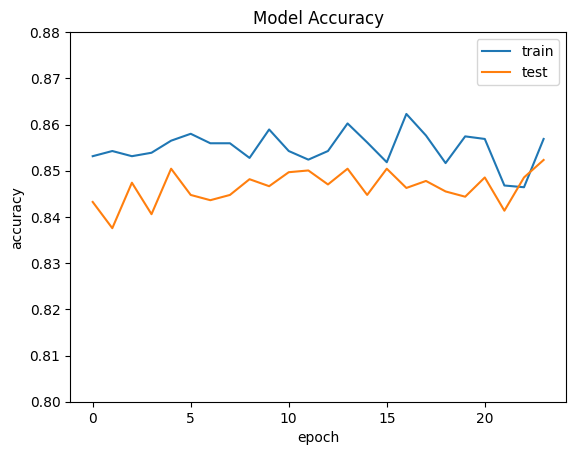

In [140]:
# plot for graph for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.80,0.88)
plt.legend(['train','test'],loc='best')
plt.show()

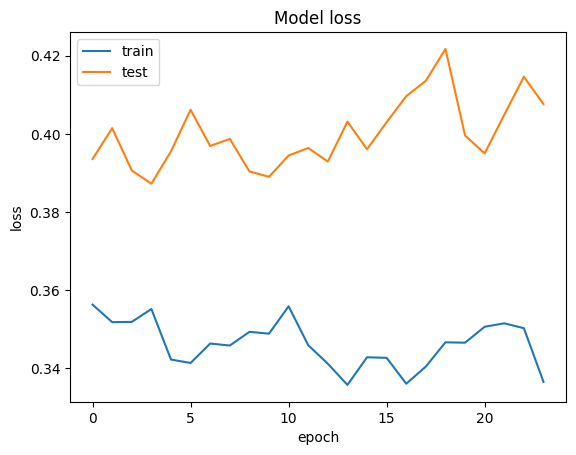

In [142]:
# plot for graph for history accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [71]:
# keys for monitors in early stopping
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [131]:
# Predict the model
y_pred=classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


In [143]:
# Accuracy score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [144]:
conf = confusion_matrix(y_test,y_pred)
conf

array([[1516,   79],
       [ 221,  184]])

In [145]:
acc = accuracy_score(y_pred,y_test)
acc

0.85

In [146]:
class_report = classification_report(y_pred,y_test)
print(class_report)

              precision    recall  f1-score   support

       False       0.95      0.87      0.91      1737
        True       0.45      0.70      0.55       263

    accuracy                           0.85      2000
   macro avg       0.70      0.79      0.73      2000
weighted avg       0.89      0.85      0.86      2000



In [148]:
classifier.get_weights()

[array([[ -1.7383196 ,   1.0101134 ,  -0.6635973 ,  -1.117815  ,
           1.4725254 ,  -0.08506773,   1.3686457 ,  -1.3123922 ,
           1.5538745 ,  -2.7564437 ,  -0.5396174 ],
        [  8.183326  ,   1.4791074 ,   4.703617  ,  -6.39187   ,
          -3.341677  ,   0.73347664,  -1.5123984 ,  -0.36007604,
           1.9763709 ,  -3.5835326 ,  -0.9023904 ],
        [  0.31193382,   0.765922  ,  -0.04659849,   0.47511762,
           0.57920426,   1.74228   ,  -4.515653  ,   1.0451851 ,
           0.9920487 ,  -2.9983003 ,  -0.38667822],
        [ -1.0436152 , -10.805135  ,  -0.06230076,  -2.2858028 ,
          -4.063078  ,  -1.9625319 ,   1.6611158 ,  -1.381052  ,
           0.6895729 ,   1.8038862 ,  -3.2878673 ],
        [ -3.221059  ,  -7.7196584 ,   8.974237  ,   0.54597145,
          -2.7801912 ,  -0.21031332,  -2.996693  ,  -5.645118  ,
           0.4659042 ,  -1.5196072 ,  -3.4205706 ],
        [  0.15957867,   0.5648776 ,  -0.635778  ,   0.31237024,
          -2.1594713 ,   